In [6]:
import numpy as np
import matplotlib.pyplot as plt

from constants import FIGSIZE

In [7]:
# Powermeter data ([m], [px], [px])
x_arr, FWHM_horiz_arr, FWHM_vert_arr = np.loadtxt(
    fname='data/Kaustik/Messwerttabellen - Strahlkaustik.csv',
    delimiter=',',
    skiprows=1
).T

# Pixel size of the camera [10^-6 m]
px_size = 5.6e-6

# Convert the FWHM arrays to meter
FWHM_horiz_arr *= px_size
FWHM_vert_arr *= px_size

# Path length before the lens [m]
d_exit_mirror__mirror_1 = 10.3e-2
d_mirror_1__mirror_2 = 25.0e-2
d_mirror_2__lens = 29.5e-2

d_exit_mirror__lens = sum([
    d_exit_mirror__mirror_1,
    d_mirror_1__mirror_2,
    d_mirror_1__mirror_2
])

# Error for individual length measurement [m]
std_d = 3e-3
# Error for 4 combined length measurements
std_distance = 4 * std_d

In [8]:
#TODO: Fit theoretical caustic

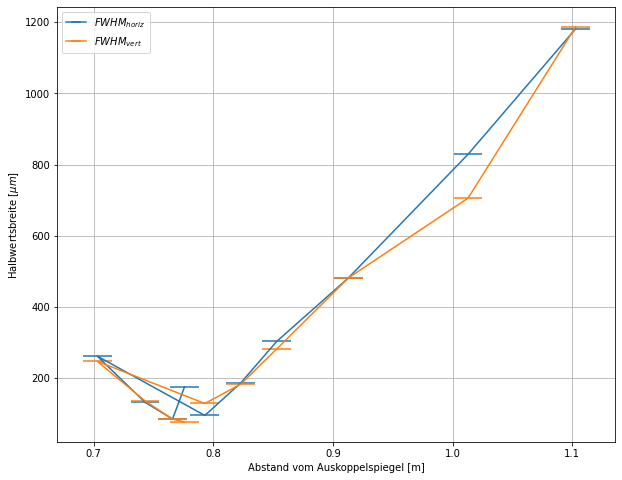

In [9]:
# Create plot
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.set_xlabel('Abstand vom Auskoppelspiegel [m]')
ax.set_ylabel('Halbwertsbreite [$ \\mu m$]')
ax.grid()

# Plot measurements, convert beam size to micrometer
# TODO: Error for FWHM values?
# TODO: Which one to use? Average?
ax.errorbar(x=d_exit_mirror__lens + x_arr, xerr=std_distance, y=FWHM_horiz_arr * 1e6, label='$FWHM_{horiz}$')
ax.errorbar(x=d_exit_mirror__lens + x_arr, xerr=std_distance, y=FWHM_vert_arr * 1e6, label='$FWHM_{vert}$')

# TODO: Plot fit

ax.legend()

In [10]:
fig.savefig('figs/aufgabe1.3c.svg', bbox_inches='tight')